In [53]:
# Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [54]:
# Charger le dataset
file_path = 'boston_housing_dataset.csv'
data = pd.read_csv(file_path)

In [55]:
# Analyse exploratoire
print("Aperçu des premières lignes:")
print(data.head())
print("\nInformations générales:")
data.info()
print("\nStatistiques descriptives:")
print(data.describe())


Aperçu des premières lignes:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHA

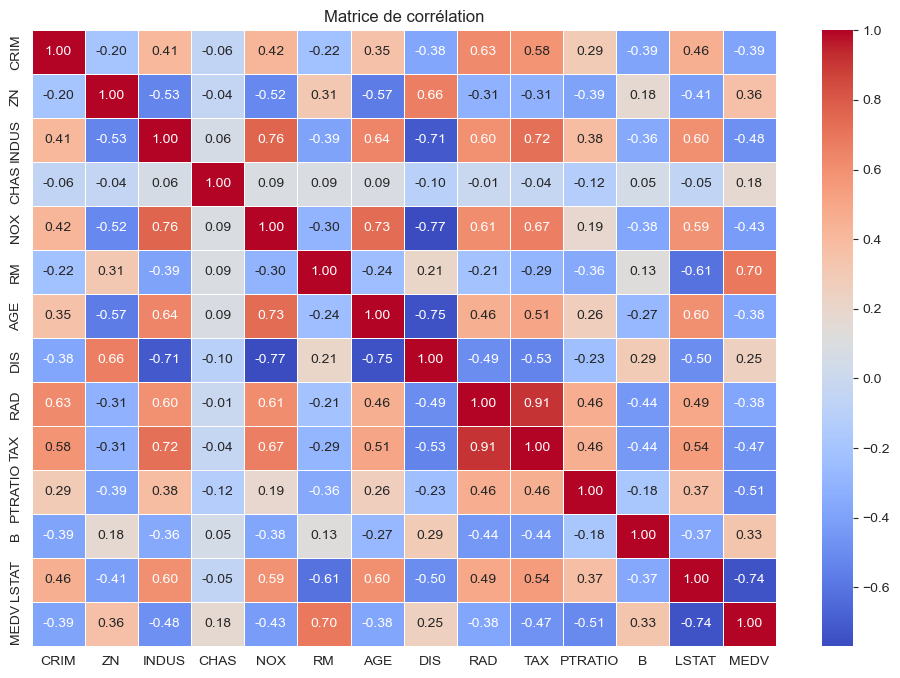

In [56]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


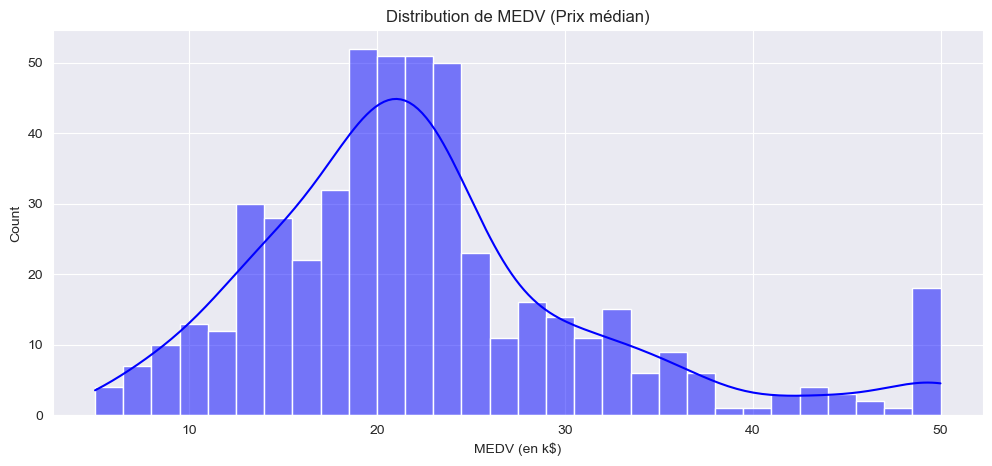

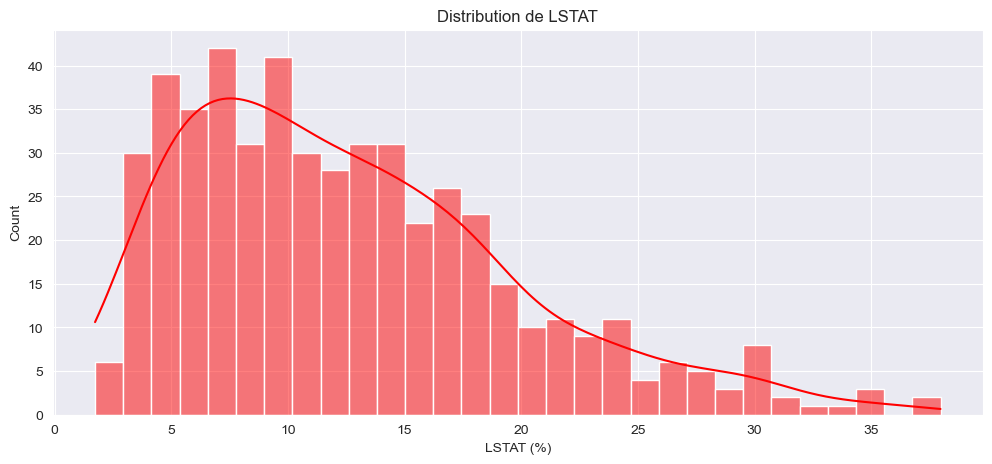

In [57]:
# Visualisation des distributions
plt.figure(figsize=(12, 5))
sns.histplot(data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution de MEDV (Prix médian)')
plt.xlabel('MEDV (en k$)')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data['LSTAT'], kde=True, bins=30, color='red')
plt.title('Distribution de LSTAT')
plt.xlabel('LSTAT (%)')
plt.show()

In [58]:
# Suppression des outliers et sélection des variables
cleaned_data = data[(data['MEDV'] < 50) & (data['LSTAT'] <= 30)]
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'TAX', 'AGE']
cleaned_data = cleaned_data[selected_features + ['MEDV']]

In [59]:
# Séparer les jeux de données brut et nettoyé
X_raw = data.drop(columns=['MEDV'])
y_raw = data['MEDV']

X_cleaned = cleaned_data.drop(columns=['MEDV'])
y_cleaned = cleaned_data['MEDV']

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [60]:
# Standardisation des données nettoyées
scaler = StandardScaler()
X_cleaned_train_std = scaler.fit_transform(X_cleaned_train)
X_cleaned_test_std = scaler.transform(X_cleaned_test)

In [61]:
# Régression linéaire
model_raw = LinearRegression()
model_cleaned = LinearRegression()

model_raw.fit(X_raw_train, y_raw_train)
model_cleaned.fit(X_cleaned_train, y_cleaned_train)

y_raw_pred = model_raw.predict(X_raw_test)
y_cleaned_pred = model_cleaned.predict(X_cleaned_test)

In [62]:
# Évaluation des modèles linéaires
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

raw_metrics = evaluate_model(y_raw_test, y_raw_pred)
cleaned_metrics = evaluate_model(y_cleaned_test, y_cleaned_pred)

print("\nPerformances sur le dataset brut:")
print(raw_metrics)
print("\nPerformances sur le dataset nettoyé:")
print(cleaned_metrics)



Performances sur le dataset brut:
{'MAE': 3.189091965887843, 'MSE': 24.29111947497345, 'RMSE': 4.92860218266533, 'R2': 0.6687594935356329}

Performances sur le dataset nettoyé:
{'MAE': 3.0890578274353317, 'MSE': 15.29114009727069, 'RMSE': 3.9103887399171313, 'R2': 0.7646171779214597}


In [63]:
# Modèles ensemblistes
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

ensemble_metrics = {}
for name, model in models.items():
    model.fit(X_cleaned_train, y_cleaned_train)
    y_pred = model.predict(X_cleaned_test)
    ensemble_metrics[name] = evaluate_model(y_cleaned_test, y_pred)

print("\nPerformances des modèles ensemblistes:")
for name, metrics in ensemble_metrics.items():
    print(f"{name}: {metrics}")



Performances des modèles ensemblistes:
Decision Tree: {'MAE': 2.5239583333333333, 'MSE': 14.619270833333337, 'RMSE': 3.823515507139122, 'R2': 0.7749595384261307}
Random Forest: {'MAE': 2.150791666666668, 'MSE': 9.315359208333339, 'RMSE': 3.0521073389272106, 'R2': 0.8566048361871861}
Gradient Boosting: {'MAE': 2.1660840531110868, 'MSE': 10.146798026689394, 'RMSE': 3.1854039032263075, 'R2': 0.8438061557614389}


In [64]:
# Analyse de la donnée au 100ème rang
sample_100 = data.iloc[99].copy()
sample_features = sample_100[selected_features].values.reshape(1, -1)
predicted_value = models["Random Forest"].predict(sample_features)[0]
original_value = sample_100['MEDV']

mae_sample = mean_absolute_error([original_value], [predicted_value])
mape_sample = np.mean(np.abs((original_value - predicted_value) / original_value)) * 100

print(f"\nPrédiction pour la donnée au 100ème rang:\nValeur réelle: {original_value}, Valeur prédite: {predicted_value}, MAE: {mae_sample}, MAPE: {mape_sample}")



Prédiction pour la donnée au 100ème rang:
Valeur réelle: 33.2, Valeur prédite: 32.92299999999996, MAE: 0.27700000000004366, MAPE: 0.8343373493977218


C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
# Ajustements des variables pour tester leur influence
medians = cleaned_data.median()
max_values = cleaned_data.max()

scenarios = {
    "Original": sample_features,
    "Median LSTAT": sample_features.copy(),
    "Max LSTAT": sample_features.copy(),
    "Median RM": sample_features.copy(),
    "Max RM": sample_features.copy(),
    "Median AGE": sample_features.copy(),
    "Max AGE": sample_features.copy(),
}

scenarios["Median LSTAT"][0, selected_features.index("LSTAT")] = medians["LSTAT"]
scenarios["Max LSTAT"][0, selected_features.index("LSTAT")] = max_values["LSTAT"]
scenarios["Median RM"][0, selected_features.index("RM")] = medians["RM"]
scenarios["Max RM"][0, selected_features.index("RM")] = max_values["RM"]
scenarios["Median AGE"][0, selected_features.index("AGE")] = medians["AGE"]
scenarios["Max AGE"][0, selected_features.index("AGE")] = max_values["AGE"]

scenario_predictions = {name: models["Random Forest"].predict(features)[0] for name, features in scenarios.items()}

print("\nPrédictions pour les différents scénarios:")
for scenario, prediction in scenario_predictions.items():
    print(f"{scenario}: {prediction}")



Prédictions pour les différents scénarios:
Original: 32.92299999999996
Median LSTAT: 29.035999999999987
Max LSTAT: 25.107
Median RM: 24.29799999999999
Max RM: 40.58900000000001
Median AGE: 32.68299999999997
Max AGE: 33.73799999999997


C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\h

In [66]:
# Partie 2 : Régression régularisée
alphas = [0.1, 1, 10, 100]
regularization_metrics = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)

    ridge.fit(X_cleaned_train_std, y_cleaned_train)
    lasso.fit(X_cleaned_train_std, y_cleaned_train)
    elastic_net.fit(X_cleaned_train_std, y_cleaned_train)

    ridge_pred = ridge.predict(X_cleaned_test_std)
    lasso_pred = lasso.predict(X_cleaned_test_std)
    elastic_net_pred = elastic_net.predict(X_cleaned_test_std)

    regularization_metrics[f"Ridge (alpha={alpha})"] = evaluate_model(y_cleaned_test, ridge_pred)
    regularization_metrics[f"Lasso (alpha={alpha})"] = evaluate_model(y_cleaned_test, lasso_pred)
    regularization_metrics[f"ElasticNet (alpha={alpha})"] = evaluate_model(y_cleaned_test, elastic_net_pred)

print("\nPerformances des régressions régularisées:")
for name, metrics in regularization_metrics.items():
    print(f"{name}: {metrics}")


Performances des régressions régularisées:
Ridge (alpha=0.1): {'MAE': 3.0892023174854146, 'MSE': 15.291318766322755, 'RMSE': 3.910411585283927, 'R2': 0.764614427595099}
Lasso (alpha=0.1): {'MAE': 3.1116742724808133, 'MSE': 15.398989030950688, 'RMSE': 3.9241545625714958, 'R2': 0.7629570148331435}
ElasticNet (alpha=0.1): {'MAE': 3.129511530839823, 'MSE': 15.484448418166608, 'RMSE': 3.9350283884829356, 'R2': 0.761641503261866}
Ridge (alpha=1): {'MAE': 3.0905034610123323, 'MSE': 15.293099255804568, 'RMSE': 3.910639238769612, 'R2': 0.7645870197866398}
Lasso (alpha=1): {'MAE': 3.4039995659947606, 'MSE': 18.514201597291216, 'RMSE': 4.302813218963985, 'R2': 0.7150032637998478}
ElasticNet (alpha=1): {'MAE': 3.5823965927224726, 'MSE': 20.21389777063735, 'RMSE': 4.495986851697562, 'R2': 0.6888391400384208}
Ridge (alpha=10): {'MAE': 3.103556828138705, 'MSE': 15.326386520740902, 'RMSE': 3.9148929130617227, 'R2': 0.7640746151974366}
Lasso (alpha=10): {'MAE': 6.175692626527051, 'MSE': 65.60178196926

In [67]:
# Prédiction avec ElasticNet et la donnée au 100ème rang
elastic_net_best = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_best.fit(X_cleaned_train_std, y_cleaned_train)

sample_features_std = scaler.transform(sample_features)
elastic_net_prediction = elastic_net_best.predict(sample_features_std)[0]

mape_elastic_net = np.mean(np.abs((original_value - elastic_net_prediction) / original_value)) * 100

print(f"\nPrédiction ElasticNet:\nValeur prédite: {elastic_net_prediction}, MAPE: {mape_elastic_net}")



Prédiction ElasticNet:
Valeur prédite: 30.751414892146812, MAPE: 7.375256348955393


C:\Users\hachh\miniconda3\envs\MSPR\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
# Partie 2 : Réseau neuronal dense (1 couche cachée)
mlp_single = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', alpha=0.001,
                          learning_rate='adaptive', max_iter=1000, random_state=42, early_stopping=True)
mlp_single.fit(X_cleaned_train_std, y_cleaned_train)
mlp_single_pred = mlp_single.predict(X_cleaned_test_std)
mlp_single_metrics = evaluate_model(y_cleaned_test, mlp_single_pred)

print("\nPerformances du réseau neuronal (1 couche cachée):")
print(mlp_single_metrics)


Performances du réseau neuronal (1 couche cachée):
{'MAE': 2.456921978366782, 'MSE': 11.316609019520186, 'RMSE': 3.3640167983409635, 'R2': 0.8257987729868767}


In [69]:
# Prédiction pour la donnée au 100ème rang avec le MLP
mlp_single_prediction = mlp_single.predict(sample_features_std)[0]
mape_mlp_single = np.mean(np.abs((original_value - mlp_single_prediction) / original_value)) * 100

print(f"\nPrédiction MLP (1 couche cachée):\nValeur prédite: {mlp_single_prediction}, MAPE: {mape_mlp_single}")



Prédiction MLP (1 couche cachée):
Valeur prédite: 32.84751382678985, MAPE: 1.061705340994436


In [70]:
# Réseau neuronal dense (2 couches cachées)
mlp_double = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.001,
                          learning_rate='adaptive', max_iter=1000, random_state=42, early_stopping=True)
mlp_double.fit(X_cleaned_train_std, y_cleaned_train)
mlp_double_pred = mlp_double.predict(X_cleaned_test_std)
mlp_double_metrics = evaluate_model(y_cleaned_test, mlp_double_pred)

print("\nPerformances du réseau neuronal (2 couches cachées):")
print(mlp_double_metrics)



Performances du réseau neuronal (2 couches cachées):
{'MAE': 2.396927607386662, 'MSE': 11.183066615605666, 'RMSE': 3.344109240979676, 'R2': 0.8278544462526106}


In [71]:

# Prédiction pour la donnée au 100ème rang avec le MLP (2 couches)
mlp_double_prediction = mlp_double.predict(sample_features_std)[0]
mape_mlp_double = np.mean(np.abs((original_value - mlp_double_prediction) / original_value)) * 100

print(f"\nPrédiction MLP (2 couches cachées):\nValeur prédite: {mlp_double_prediction}, MAPE: {mape_mlp_double}")



Prédiction MLP (2 couches cachées):
Valeur prédite: 33.55004326818265, MAPE: 1.0543471933212207
